# Problem Statement
## The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention.



## Importing Libraries

In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import randint
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.neighbors import KNeighborsClassifier


# Importing DataSet

We have saved the resume data in to csv file after performing EDA. We are going to use the same for further model building.

In [3]:
resume_data=pd.read_csv("Cleaned_Resume_Data.csv")

In [4]:
resume_data.head(5)

,Resume_Text,Category
0,anubhav kumar singh core competency scripting ...,0
1,g ananda rayudu httpswwwlinkedincominanandguda...,0
2,peoplesoft database administrator gangareddy p...,0
3,classification internal classification interna...,0
4,priyanka ramadoss mountpleasant coonoor nilgir...,0


# Feature Extraction

In [5]:
#We have to extract features from Resume_Text column

cv = TfidfVectorizer()
#cv = TfidfVectorizer(max_features = 1000)
# X contains corpus (dependent variable)

X = cv.fit_transform(resume_data.Resume_Text.values).toarray()
X=pd.DataFrame(X,columns=cv.get_feature_names_out())

# Features/Target Column

In [6]:
#Features
X

,aa,ab,abdul,abilitiescommunication,ability,able,abovementioned,abreast,absence,absent,...,young,youre,yoursincerely,yr,zealand,zenefits,zero,zerozilla,zone,zp
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.029178,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.039849,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.021730,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.0,0.0,0.0,0.014787,0.0,0.000000,0.000000,0.043981,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.016287,0.0,0.000000,0.000000,0.169549,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.020512,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.016128,0.0,0.000000,0.000000,0.047972,0.0,...,0.0,0.0,0.0,0.0,0.035463,0.0,0.0,0.0,0.0,0.0


In [7]:
#Target Column
# Category is Target Column
Y=resume_data['Category']
Y

0     0
1     0
2     0
3     0
4     0
     ..
74    3
75    3
76    3
77    3
78    3
Name: Category, Length: 79, dtype: int64

# Split Train/Text data

In [8]:
#We are going to randomly split the data into Train and Text

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, test_size=0.25,stratify=resume_data.Category.values)
X_train.shape, X_test.shape

((59, 4431), (20, 4431))

In [9]:
X_train.head()

,aa,ab,abdul,abilitiescommunication,ability,able,abovementioned,abreast,absence,absent,...,young,youre,yoursincerely,yr,zealand,zenefits,zero,zerozilla,zone,zp
39,0.0,0.0,0.0,0.0,0.063105,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.024139,0.0,0.0,0.0,0.035899,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.018818,0.0,0.0,0.0,0.055973,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_test.head()

,aa,ab,abdul,abilitiescommunication,ability,able,abovementioned,abreast,absence,absent,...,young,youre,yoursincerely,yr,zealand,zenefits,zero,zerozilla,zone,zp
47,0.0,0.0,0.0,0.0,0.022354,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Classification Model

##  Random Forest

In [11]:
#Hyper Parameter tuning
clf = RandomForestClassifier()
param_grid = [{'criterion':['gini', 'entropy'],'n_estimators':randint(10,150),'max_depth': randint(3,8) }]
rand_search = RandomizedSearchCV(clf,param_grid,cv=5,n_iter=10)
rand_search.fit(X_train,Y_train)      

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000289FA41F070>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000289FA41AEE0>}])

In [12]:
#Value of optimized parameters
rand_search.best_params_ , rand_search.best_score_

({'criterion': 'gini', 'max_depth': 5, 'n_estimators': 82}, 0.95)

In [13]:
#Building Random Forest Model with optimized parameters
model_RFG=RandomForestClassifier(n_estimators=rand_search.best_params_['n_estimators'],
                                 criterion=rand_search.best_params_['criterion'],
                                 max_depth=rand_search.best_params_['max_depth'])
model_RFG.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=82)

In [14]:
#Predicting on test data
Y_pred = model_RFG.predict(X_test) # predicting on test data set
Y_pred

array([2, 1, 0, 2, 0, 1, 3, 3, 3, 0, 3, 2, 1, 1, 1, 2, 0, 0, 3, 1],
      dtype=int64)

In [15]:
#Accuracy of the model
acc_RFG=metrics.accuracy_score(Y_pred,Y_test)
print(acc_RFG)

1.0


In [16]:
#Classification Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## XGBoost Classification

In [17]:
#Hyper Parameter tuning
clf = XGBClassifier()
param_grid = [{'n_estimators':randint(10,150), 'max_depth': randint(3,8)}]
rand_search = RandomizedSearchCV(clf,param_grid,cv=5,n_iter=10)
rand_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [18]:
#Value of optimized parameters
rand_search.best_params_ , rand_search.best_score_

({'max_depth': 3, 'n_estimators': 149}, 0.9651515151515151)

In [19]:
#Building xgb model with optimized hyperparameter value
model_xgb = XGBClassifier(n_estimators=rand_search.best_params_['n_estimators'],
                          max_depth=rand_search.best_params_['max_depth'])
model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=149, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [20]:
#Predicting values for test data
Y_pred = model_xgb.predict(X_test)
Y_pred

array([2, 1, 0, 2, 0, 1, 3, 3, 3, 0, 3, 2, 1, 1, 1, 2, 0, 0, 3, 1],
      dtype=int64)

In [21]:
#Accuracy of the model
acc_XGB=metrics.accuracy_score(Y_pred,Y_test)
print(acc_XGB)

1.0


In [22]:
#Classifcation Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# SVM Model

In [23]:
#rbf Kernel
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [24]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.9666666666666668)

In [25]:
accuracy = gsv.score(X_test, Y_test)
print('Accuracy:', accuracy)

Accuracy: 0.95


In [26]:
#Linear Kernel
clf = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear']}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']})

In [27]:
grid_search.best_params_ , grid_search.best_score_ 

({'C': 1, 'kernel': 'linear'}, 0.9666666666666666)

In [28]:
accuracy = grid_search.score(X_test, Y_test)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [29]:
clf_1 = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear']}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']})

In [30]:
clf_1.fit(X_train,Y_train)

SVC()

In [31]:
test_pred=clf_1.predict(X_test)

In [32]:
confusion_matrix(Y_test,test_pred)

array([[4, 1, 0, 0],
       [0, 6, 0, 0],
       [0, 1, 3, 0],
       [0, 0, 0, 5]], dtype=int64)

In [33]:
print(classification_report(Y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.94      0.89      0.90        20
weighted avg       0.93      0.90      0.90        20



In [34]:
#Accuracy of the model
acc_SVM=metrics.accuracy_score(Y_test,test_pred)
print(acc_SVM)

0.9


# Decision Tree Model

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

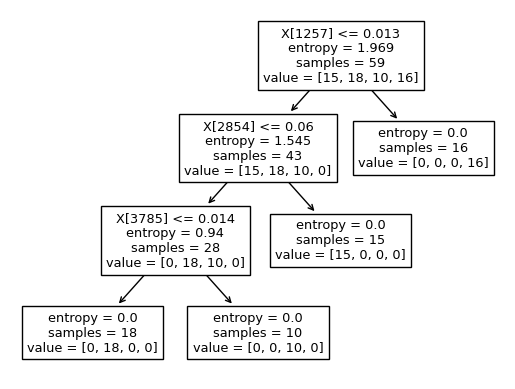

In [36]:
tree.plot_tree(model);

In [37]:
preds = model.predict(X_test) 
pd.Series(preds).value_counts()

1    6
0    5
3    5
2    4
dtype: int64

In [38]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [39]:
#Accuracy of the model
acc_DT=metrics.accuracy_score(preds,Y_test)
print(acc_DT)

1.0


# Naive Bayes

In [40]:
#Model Train
classifier_mb = MB()
classifier_mb.fit(X_train,Y_train)

#Model Test 
train_pred_m = classifier_mb.predict(X_train)

#Model accuracy
accuracy_train_m = metrics.accuracy_score(Y_train,train_pred_m)

test_pred_m = classifier_mb.predict(X_test)
acc_Naive=metrics.accuracy_score(test_pred_m,Y_test)
print(acc_Naive)

0.9


In [41]:
print('Accuracy of Trainin set : ',accuracy_train_m)
print('Accuracy of Testing set:',acc_Naive)

Accuracy of Trainin set :  1.0
Accuracy of Testing set: 0.9


In [42]:
print(classification_report(test_pred_m,Y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.89      0.93      0.89        20
weighted avg       0.92      0.90      0.90        20



# KNN

In [43]:
# Grid Search for algorithm tuning
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

In [44]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [45]:
k_score = print(grid.best_score_)
print(grid.best_params_)

0.9875
{'n_neighbors': 2}


In [46]:
# Model Building
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train,Y_train)

#Model Test 
train_pred_knn = model_knn.predict(X_train)

#Model accuracy
accuracy_train_knn = metrics.accuracy_score(Y_train,train_pred_knn)

test_pred_knn = model_knn.predict(X_test)
acc_Knn=metrics.accuracy_score(test_pred_knn,Y_test)
print(acc_Knn)

0.95


In [47]:
print('Accuracy of Trainin set : ',accuracy_train_knn)
print('Accuracy of Testing set:',acc_Knn)

Accuracy of Trainin set :  1.0
Accuracy of Testing set: 0.95


In [48]:
print(classification_report(test_pred_knn,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



# Logistic Regression

In [49]:
# Model Building
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)

#Model Test 
train_pred_log= model_log.predict(X_train)

#Model accuracy
accuracy_train_log = metrics.accuracy_score(Y_train,train_pred_log)

test_pred_log = model_log.predict(X_test)
acc_log=metrics.accuracy_score(test_pred_log,Y_test)
print(acc_log)


0.95


In [50]:
print('Accuracy of Trainin set : ',accuracy_train_log)
print('Accuracy of Testing set:',acc_log)

Accuracy of Trainin set :  1.0
Accuracy of Testing set: 0.95


In [51]:
cm = confusion_matrix(test_pred_log,Y_test)
print(cm)

[[4 0 0 0]
 [1 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]


In [52]:
print(classification_report(test_pred_log,Y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.95      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



# Model Accuracy Table

In [53]:
Evaluation ={"Models":pd.Series(['Random Forest','XGboost','SVM','Decision Tree','Naive Bayes','KNN','Logistic Regression']),'Accuracy':pd.Series([acc_RFG,acc_XGB,acc_SVM,acc_DT,acc_Naive,acc_Knn,acc_log])}
Accuracy_Table = pd.DataFrame(Evaluation)
Accuracy_Table.sort_values(['Accuracy'])

,Models,Accuracy
2,SVM,0.90
4,Naive Bayes,0.90
5,KNN,0.95
6,Logistic Regression,0.95
0,Random Forest,1.00
1,XGboost,1.00
3,Decision Tree,1.00


# Model Deployement

In [54]:
import pickle

In [55]:
pickle.dump(model_xgb,open('C:/Users/Sudeep/python files/DS Project 2/Deployement/model_saved.pkl','wb'))

In [56]:
pickle.dump(cv,open('C:/Users/Sudeep/python files/DS Project 2/Deployement/vector.pkl','wb'))

In [ ]:
res